In [1]:
#### These three lines should be in a cell at the top of any notebook
#### These lines load standard tools that will be usefull to us
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Generating a random variable, uniformly distributed between zero and one

In [7]:
u1 = rand(1)
print(u1)
u2 = rand(5)
print(u2)

[0.53402243]
[0.34461932 0.65659368 0.51248694 0.71331918 0.67274306]


# Using a uniform random variable to generate an exponentially-distributed random variable
Assume that $\tau$ is distributed exponentially with rate parameter $k$. That is,
$$\text{Prob}[t < \tau] = e^{-kt}.$$
We can generate a sample of $\tau$ as follows.

u = [0.32269741]
tau = [1.74006184]


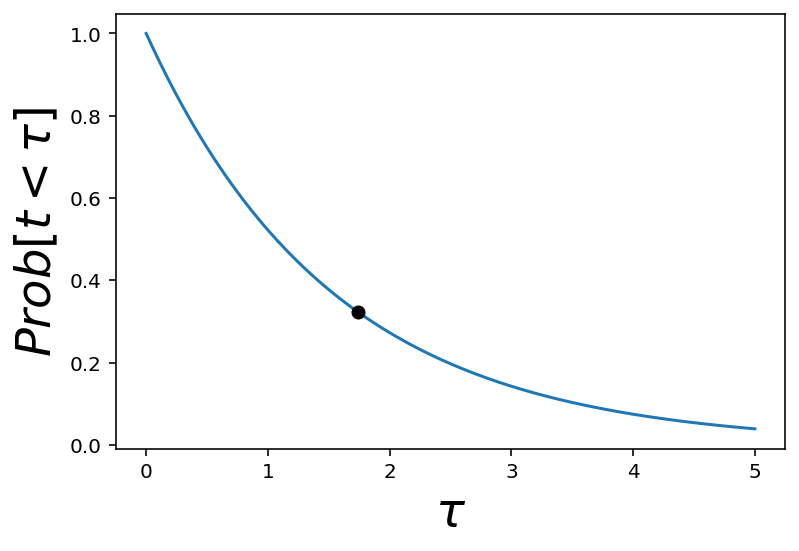

In [23]:
k = 0.65
u = rand(1)
print('u =', u)
tau = -log(u)/k
print('tau =', tau)

##### graphical representation
t = linspace(0, 5, 200) # make an array of 200 numbers between 0 and 5
plot(t, exp(-k*t))
plot(tau, u, 'ko') # the 'ko' option specifies a black ('k') colored circle ('o')
xlabel('t', fontsize=24)
ylabel(r'$Prob[t < \tau]$', fontsize=24);

# Exponential Growth
Suppose the number of individuals in the population is $N(t)$, an integer-valued random process. Assume that the population is inatially $N(0) = n_0$, with $n_0$ a parameter called the initial condition. Suppose the rate at which a single individual gives rise to a new individual is given by rate parameter $r>0$. The total rate of increasing the population of $N$ individuals by one is then $Nr$. We can represent this with the state transition diagram
$$ (N) {{N r \atop\longrightarrow}\atop {}} (N+1) $$

---
The deterministic ODE version of exponential growth is
$$ \dot{N} = rN, \quad N(0) = n_0.$$
The solution to this equation is
$$ N(t) = n_0 e^{rt}.$$

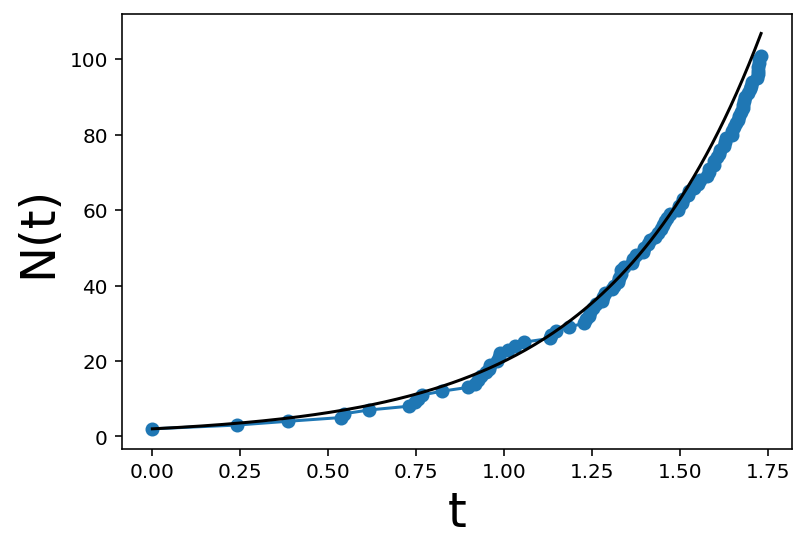

In [18]:
r = 2.3
n0 = 2
Nsteps = 100
N = zeros(Nsteps)
N[0] = n0
T = zeros(Nsteps)
T[0] = 0
for j in arange(1, Nsteps):
    u = rand(1)
    tau = -log(u)/(N[j-1]*r)
    T[j] = T[j-1] + tau
    N[j] = N[j-1] + 1
    
######## plot the result
plot(T, N, '-o') # the option '-o' makes a line with 'o' symbols at the jump times
## make a deterministic exponential growth curve for comparison
T_deterministic = linspace(0, T[-1], 200) # T[-1] is the last entry of the array T
N_deterministic = n0*exp(r*T_deterministic)
plot(T_deterministic, N_deterministic, 'k') # the 'k' option make the curve black
xlabel('t', fontsize=24)
ylabel('N(t)', fontsize=24);

# Let's make it into an interactive widget!

In [19]:
@interact(r=(0.5, 10., 0.5), Nsteps=(10, 1000, 10)) # variable=(begin, end, step_size)
def plot_function(r=0.5, Nsteps=10): # variable=default_value
    n0 = 2
    N = zeros(Nsteps)
    N[0] = n0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        u = rand(1)
        tau = -log(u)/(N[j-1]*r)
        T[j] = T[j-1] + tau
        N[j] = N[j-1] + 1

    ######## plot the result
    plot(T, N, '-o') # the option '-o' makes a line with 'o' symbols at the jump times
    ## make a deterministic exponential growth curve for comparison
    T_deterministic = linspace(0, T[-1], 200) # T[-1] is the last entry of the array T
    N_deterministic = n0*exp(r*T_deterministic)
    plot(T_deterministic, N_deterministic, 'k') # the 'k' option make the curve black
    xlabel('t', fontsize=24)
    ylabel('N(t)', fontsize=24);

interactive(children=(FloatSlider(value=0.5, description='r', max=10.0, min=0.5, step=0.5), IntSlider(value=10…

# Logistic growth (ODE Version)
Recall, the Logistic Growth equation
$$ \dot{x} = rx \left(1 - \frac{x}{K}\right),$$
where $r$ is the intrinsic growth rate and $K$ is the population carying capacity.

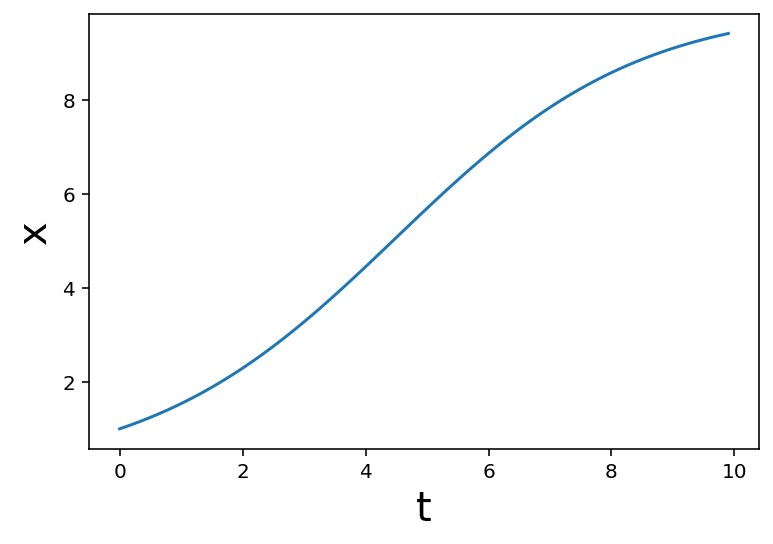

In [22]:
def logistic_ode(r, K, x0, Nsteps): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.1 # The size of the time step
    x = zeros(Nsteps) # an array of zeros to store the solution in
    x[0] = x0 # store the initial condition
    def f_logistic(x): # the ligistic growth RHS function
        return r*x*(1 - x/K)
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        x[n] = x[n-1] + Delta_t*f_logistic(x[n-1])
    t = Delta_t*arange(Nsteps)
    return t, x

r = 0.5
K = 10.
x0 = 1.
Nsteps = 100
Tode, Xode = logistic_ode(r, K, x0, Nsteps)

plot(Tode, Xode)
xlabel('t', fontsize=20)
ylabel('x', fontsize=20);

# Let's make it into an interactive widget!

In [25]:
@interact(r=(0.1, 2., 0.2), K=(5, 100, 5))
def plot_function(r=0.1, K=5):
    x0 = 1.
    Nsteps = 1000
    Tode, Xode = logistic_ode(r, K, x0, Nsteps)
    plot(Tode, Xode)
    xlabel('t', fontsize=20)
    ylabel('x', fontsize=20);

interactive(children=(FloatSlider(value=0.1, description='r', max=2.0, min=0.1, step=0.2), IntSlider(value=5, …

# Logistic Growth (Stochastic Version)
For the stochastic version of Logistic Growth, we assume that the birth rate works the same as for exponential growth (above). We further assume the death rate (per individual) is
$$\delta = \epsilon \frac{r}{K},$$
where $0<\epsilon\ll 1$ is a small positive parameter (the purpose of $\epsilon$ is explained below). The death rate for $N$ individuals is assumed to scale like $N^2$. Why? 
$$ (N) {{N r \atop\longrightarrow}\atop {\longleftarrow \atop (N+1)^2 \delta }} (N+1)$$

The relationship between the ODE model and the stochastic model is given by
$$ x(t) = \epsilon N(t), $$
and in the limit $\epsilon \to 0^+$, it can be shown that $N(t) \to x(t)$.

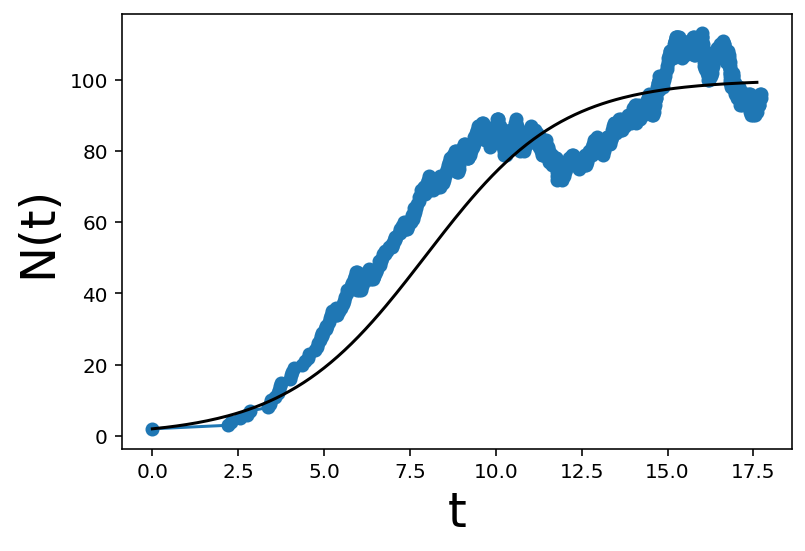

In [53]:
epsilon = 0.1 # TRY CHANGING THIS VALUE
r = 0.5
K = 10.
n0 = 2
Nsteps = 1000
N = zeros(Nsteps)
N[0] = n0
T = zeros(Nsteps)
T[0] = 0
for j in arange(1, Nsteps):
    n = N[j-1]
    combined_rate = n*r + epsilon*n**2*r/K
    u = rand(1)
    tau = -log(u)/combined_rate
    T[j] = T[j-1] + tau # update time array with new time value
    ## now we make a random variable to decide if birth or death occurs
    probability_of_birth = n*r/combined_rate
    probability_of_death = 1 - probability_of_birth
    u2 = rand(1)
    if u < probability_of_birth:
        N[j] = N[j-1] + 1 # a birth means N -> N+1
    else:
        N[j] = N[j-1] - 1
    
    
    
######## plot the result
plot(T, N, '-o') # the option '-o' makes a line with 'o' symbols at the jump times
## make a logistic ODE curve for comparison
x0 = n0*epsilon
Tode, Xode = logistic_ode(r, K, x0, int(T[-1]/0.1))
## remember to convert X to N
Node = Xode/epsilon
plot(Tode, Node, 'k')
xlabel('t', fontsize=24)
ylabel('N(t)', fontsize=24);

# Can you make it into an interactive widget?
  1. Make a widget that lets you change $r$ and $K$
  2. Make a widget that lets you change $\epsilon$